In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Apply the code from course “Geometric Transformations of Images” in image “Messi .jpg”

In [2]:
#1 - Upload an image
image = cv2.imread('MESSI.jpg')

#2 - Read an image in grayscale mode
img = cv2.imread('MESSI.jpg', cv2.IMREAD_GRAYSCALE)

#3 - Display the original and transformed images using OpenCV
cv2.namedWindow("Original", cv2.WINDOW_NORMAL)
cv2.namedWindow("Transformed", cv2.WINDOW_NORMAL)
cv2.imshow("Original", image)
cv2.imshow("Transformed", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Transformation of the image to match a second set of points

In [3]:
#4 - Apply a 2D affine transformation (translation)

rows,cols = img.shape
# To do an affine transformation, create a 2x3 transformation matrix called "M."
M = np.float32([[1,0,100],[0,1,50]])
# This matrix moves the image 50 pixels down and 100 pixels to the right (in the y-axis).


# Use the warpAffine function to apply the affine transformation to the image.
# The size of the output image is specified by the 'cols' and 'rows' variables.
# The terms "rows" and "cols" refer to the number of rows and the number of columns, respectively.
dst = cv2.warpAffine(img,M,(cols,rows))

#5 - Display the original and transformed images using OpenCV.
cv2.namedWindow("Original", cv2.WINDOW_NORMAL)
cv2.namedWindow("Transformed", cv2.WINDOW_NORMAL)
cv2.imshow("Original", img)
cv2.imshow("Transformed", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

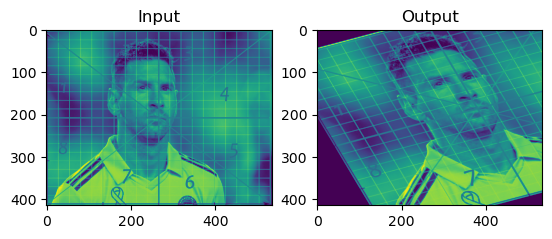

In [4]:
#6 - Calculate a 2D affine transformation matrix for a 90-degree rotation

rows,cols = img.shape
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
# The center of rotation, which is normally the center of the image, is defined as ((cols-1)/2.0, (rows-1)/2.0.
# The '1' scaling factor indicates that there is no scaling performed throughout the rotation. 


#7 - Apply this rotation to the image, creating the 'dst' image.
dst = cv2.warpAffine(img,M,(cols,rows))

#8 - Define two sets of corresponding points for an affine transformation
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

#9 - Calculate the transformation matrix 'M'
M = cv2.getAffineTransform(pts1,pts2)

#10 - Apply the transformation to the image
dst = cv2.warpAffine(img,M,(cols,rows))

#11 - Display both the input and output images using Matplotlib.
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## The perspective transformation of the image to match the second set of points effectively changes the perspective.

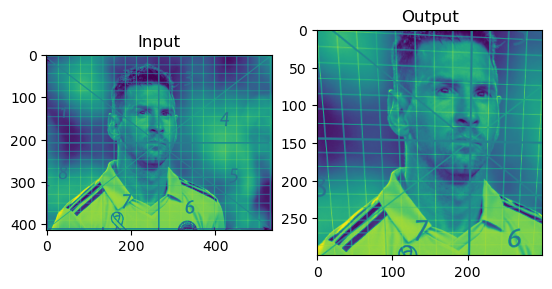

In [5]:
#12 - Define two sets of corresponding points for a perspective transformation

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

#13 - Calculate the transformation matrix 'M'
M = cv2.getPerspectiveTransform(pts1,pts2)

#14 - Apply the transformation to the image
dst = cv2.warpPerspective(img,M,(300,300))

#15 - Display both the input and output images using Matplotlib.
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Part 2: Apply change of the code from course “Geometric Transformations of Images” in image “MESSI.jpg”

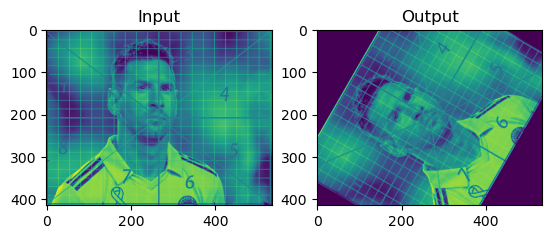

In [6]:
#1 - Image Rotation (Arbitrary Angle):
rows,cols = img.shape

# cols-1 and rows-1 are the coordinate limits.
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),60,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

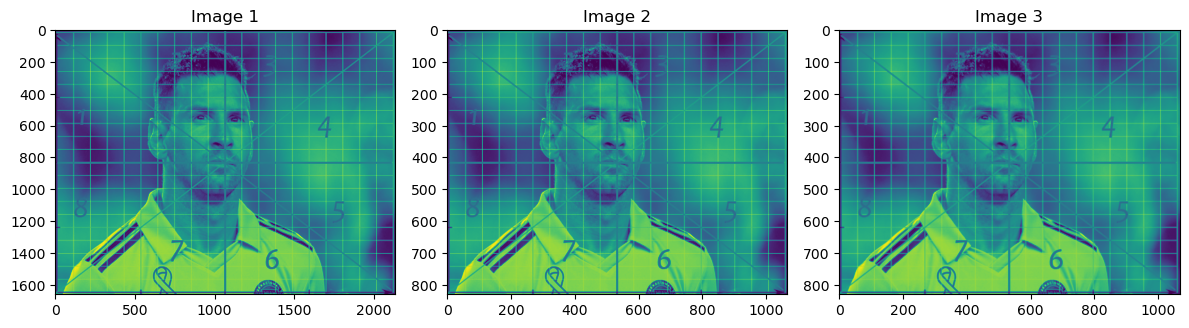

In [7]:
#2 - Scaling with Interpolation

# Resize 'img' using cubic interpolation to increase its size by a factor of 4 in both x and y directions.
res = cv2.resize(img,None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
# Resize 'img' using nearest-neighbor interpolation to increase its size by a factor of 2 in both x and y directions.
res2 = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
# Resize 'img' using bilinear interpolation to increase its size by a factor of 2 in both x and y directions.
res3 = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_LINEAR)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display the images in the subplots
axes[0].imshow(res)
axes[1].imshow(res2)
axes[2].imshow(res3)

# Add titles to the subplots
axes[0].set_title('Image 1')
axes[1].set_title('Image 2')
axes[2].set_title('Image 3')

plt.tight_layout()
plt.show()

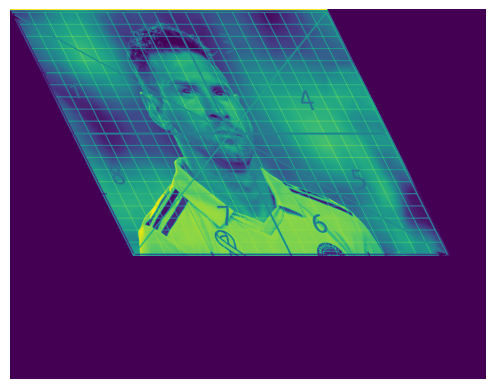

In [8]:
#3 - Shearing (Horizontal and Vertical):
#Horizontal

rows, cols, dim = image.shape
# transformation matrix for Shearing
# shearing applied to x-axis
M = np.float32([[1, 0.5, 0], [0, 1, 0], [0,   0, 1]])

             
dst = cv2.warpPerspective(img,M,(int(cols*1.5),int(rows*1.5)))
plt.axis('off')
# show the resulting image
plt.imshow(dst)
plt.show()
# save the resulting image to disk

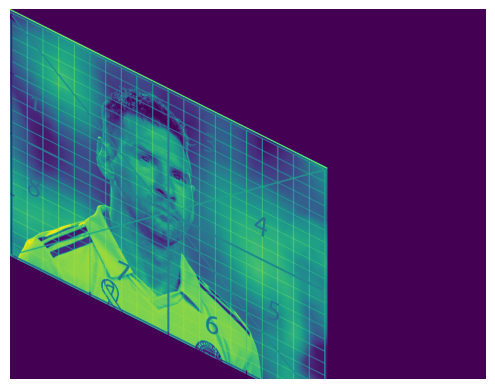

In [9]:
#Vertical


rows, cols, dim = image.shape
# transformation matrix for Shearing
# shearing applied to y-axis

M = np.float32([[1,   0, 0], [0.5, 1, 0], [0,   0, 1]])
# apply a perspective transformation to the image                
sheared_img = cv2.warpPerspective(img,M,(int(cols*1.5),int(rows*1.5)))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(sheared_img)
plt.show()
# save the resulting image to disk

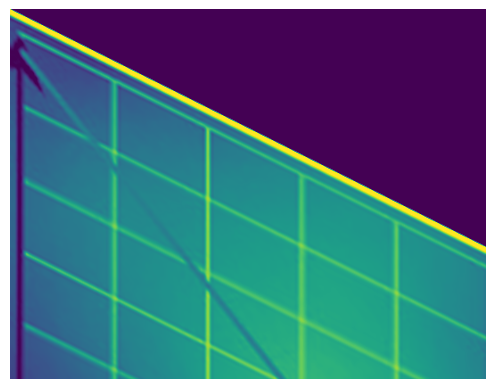

In [10]:
#4 - Affine Transformation (Including Scaling and Translation):

# Cubic interpolation is used to resize the image so that it is 4 times larger in both the x and y directions.
res = cv2.resize(img,None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
M = np.float32([[1,   0, 0], [0.5, 1, 0]])
dst = cv2.warpAffine(res,M,(cols,rows))

plt.axis('off')
# show the resulting image
plt.imshow(dst)
plt.show()

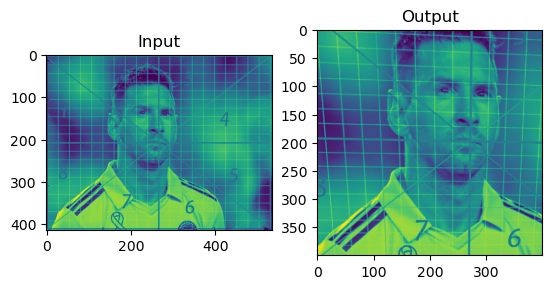

In [11]:
#5 - Perspective Transformation

# Define the source and destination points
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [400, 0], [0, 400], [400, 400]])


# Calculate the perspective transformation matrix
M = cv2.getPerspectiveTransform(pts1,pts2)

# Apply the perspective transformation to the image
dst = cv2.warpPerspective(img, M, (400, 400))


# Display the input and output images
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


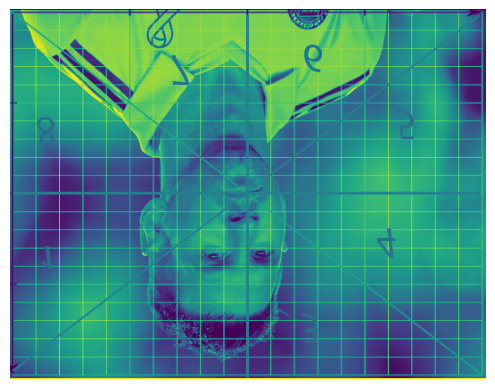

In [12]:
#6 - Image Reflection (Horizontal and Vertical):
rows, cols, dim = image.shape
# transformation matrix for x-axis reflection 
M = np.float32([[1,  0, 0   ],
                [0, -1, rows],
                [0,  0, 1   ]])



reflected_img = cv2.warpPerspective(img,M,(int(cols),int(rows)))
plt.axis('off')
plt.imshow(reflected_img)
plt.show()

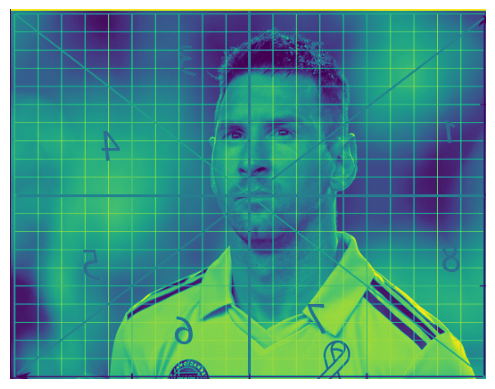

In [13]:
 # transformation matrix for y-axis reflection 
M = np.float32([[-1, 0, cols],
                 [ 0, 1, 0   ],
                 [ 0, 0, 1   ]])

reflected_img = cv2.warpPerspective(img,M,(int(cols),int(rows)))
plt.axis('off')
plt.imshow(reflected_img)
plt.show()

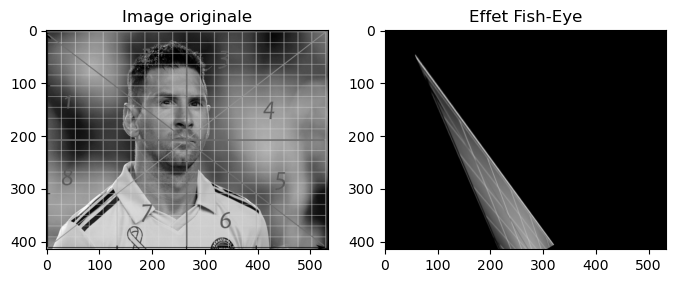

In [14]:
center_x, center_y = img.shape[1] // 2, img.shape[0] // 2
distortion_strength = 0.5

rows, cols = img.shape
M = np.float32([[1, 0, 0], [0.8, 1, 0]])  
rotated_image = cv2.warpAffine(img, M, (cols, rows))

scale_factor = 1.5  
scaled_image = cv2.resize(rotated_image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

shear_factor = 0.4  
shear_matrix = np.array([[1, shear_factor, 0], [0, 1, 0]], dtype=np.float32)
sheared_image = cv2.warpAffine(scaled_image, shear_matrix, (cols, rows))

affine_matrix = np.array([[1, 0.4, 50], [0.2, 1.8, 30]], dtype=np.float32)  
affine_image = cv2.warpAffine(sheared_image, affine_matrix, (cols, rows))

perspective_matrix = np.array([[1, 0.4, 0], [0, 1.8, 0.01], [0.001, 0.001, 1]], dtype=np.float32)  
output_image = cv2.warpPerspective(affine_image, perspective_matrix, (cols, rows))

plt.figure(figsize=(8, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Image originale')
plt.subplot(122), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)), plt.title('Effet Fish-Eye')
plt.show()


#i clearly didn't find another way to create this fisheye effect without using a function done by chatgpt